PRE-PROCESSED DATA SET USED

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("E:/SLIIT/3RD YEAR 2ND SEM/Fundamentals of Data Mining/GIT-FDM/Nethmi/NEW_preprocessed_data.csv")

In [3]:
df['beds'].value_counts()

2    54487
1    32332
3    21310
4     3687
0     3539
5      539
6      114
7       17
8       14
Name: beds, dtype: int64

In [4]:
df.drop(df.index[df['baths'] == 0.0], inplace = True)

In [5]:
df.drop(df.index[df['beds'] == 0], inplace = True)

In [6]:
df['type'].value_counts()

3    43923
2    26760
1    24157
0    17011
Name: type, dtype: int64

CEIL VALUE FOR BATHS

In [7]:
df.baths.unique()

array([2, 1, 3, 4, 5, 6, 7, 8], dtype=int64)

In [8]:
# using np.ceil to round to
df['baths'] = df['baths'].apply(np.ceil)

In [9]:
df.head(3)

,price,type,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,1220,0,1232,2,2.0,0,0,0,0,3,4,10,1
1,1375,0,1232,2,2.0,0,0,0,0,4,4,10,1
2,870,0,890,2,1.0,0,0,0,0,4,1,13,1


In [10]:
df.shape

(111851, 13)

In [11]:
#df.to_csv('Types_red.csv',index=False) 

PARTITIONING THE PRE PROCESSED DATA SET

In [12]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['price', 'sqfeet', 'beds', 'baths', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options', 'state', 'pets_allowed']]  # Features
y=df['type']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(78295, 12)
(78295,)
(33556, 12)
(33556,)


STANDARDIZATION --- accuracy dropped

In [14]:
# from sklearn.preprocessing import StandardScaler
# #the scaler model
# scaler = StandardScaler()
# #fitting and standardization
# train_scaled = scaler.fit_transform(X_train)
# # test_scaled = scaler.transform(X_test)

RANDOM FOREST MODEL BUILDING

In [15]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier()


#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

# predictions
y_pred = rfc.predict(X_test)


In [16]:
from sklearn.model_selection import StratifiedKFold

In [17]:
skf = StratifiedKFold(n_splits=10)

In [18]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9296400047681488


In [19]:
#df.loc[df['type'] == 0 ]

#df.loc[df['type'] == 1 ]

#df.loc[df['type'] == 2 ]

df.loc[df['type'] == 3 ]

,price,type,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,pets_allowed
5,685,3,900,2,1.0,1,0,0,0,0,1,22,1
6,2839,3,977,2,2.0,1,0,0,0,4,0,20,1
9,625,3,0,1,1.0,1,0,0,0,0,4,22,1
12,685,3,900,2,1.0,1,0,0,0,3,4,25,1
13,1339,3,1430,3,2.0,0,0,0,0,4,4,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115970,1200,3,1027,2,2.0,1,0,0,0,4,1,33,1
115971,795,3,600,2,1.0,1,0,0,0,1,5,33,1
115977,239,3,383,1,1.0,0,0,1,1,1,1,33,1
115993,1675,3,700,1,1.0,1,0,1,0,4,4,29,1


In [20]:
#0
#rfc.predict([[950, 889, 2, 1, 0, 0, 0, 0, 4, 1, 13, 1 ]])

#1
#rfc.predict([[995, 1085, 3, 1, 0, 0, 0, 0, 3, 435, 10, 0 ]])

#2
#rfc.predict([[700, 800, 1, 1, 1, 0, 0, 0, 1, 5, 35, 0 ]])

#3
rfc.predict([[239, 383, 1, 1, 0, 0, 1, 1, 1, 1, 33, 1 ]])

array([3], dtype=int64)

MULTI LABELLED CONFUSION MATRIX BUILDING

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
#confusion matrix creation

LABELS = ['0', '1', '2', '3']

conf_matrix = confusion_matrix(y_test, y_pred)

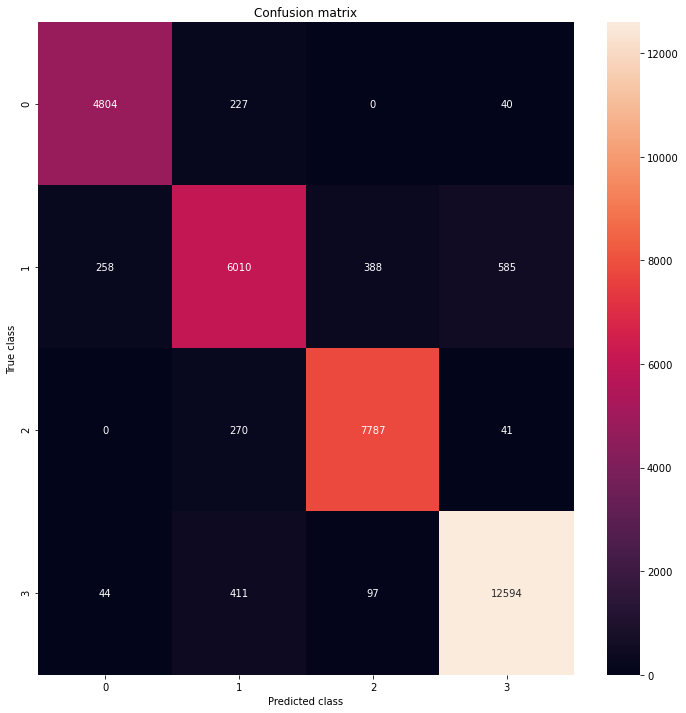

In [23]:
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [24]:
#accuracy score
from sklearn.metrics import accuracy_score

acc= accuracy_score(y_test,y_pred)
print('The accuracy is {}'.format(acc))


The accuracy is 0.9296400047681488


In [25]:
#presicion score
from sklearn.metrics import precision_score

prec= precision_score(y_test, y_pred, pos_label='positive',average='micro')
print('The precision is {}'.format(prec))


The precision is 0.9296400047681488


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [26]:
#recall score
from sklearn.metrics import recall_score

rec= recall_score(y_test,y_pred, pos_label='positive',average='micro')
print('The recall is {}'.format(rec))


The recall is 0.9296400047681488


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [27]:
#f1 score
from sklearn.metrics import f1_score

f1= f1_score(y_test,y_pred, pos_label='positive',average='micro')
print('The F1-Score is {}'.format(f1))

The F1-Score is 0.9296400047681488


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [28]:
#Mathew corelation coefficient
from sklearn.metrics import matthews_corrcoef

MCC=matthews_corrcoef(y_test,y_pred)
print('The Matthews correlation coefficient is {}'.format(MCC))

The Matthews correlation coefficient is 0.9021187451607827


In [29]:
from sklearn.model_selection import cross_val_score

cvScore = cross_val_score(rfc, X_train, y_train, cv=100, scoring='accuracy')
print('cv score mean:',cvScore.mean())